<a href="https://colab.research.google.com/github/El-Wally/Movie-Recommender/blob/wip/MoviesRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing packages**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

**Importing the dataset**

In [46]:
!wget -O moviedataset.zip https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip
print('unziping ...')
!unzip -o -j moviedataset.zip 

--2022-07-17 12:46:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160301210 (153M) [application/zip]
Saving to: ‘moviedataset.zip’

moviedataset.zip    100%[===================>] 152.88M  31.0MB/s    in 4.8s    

2022-07-17 12:46:28 (31.8 MB/s) - ‘moviedataset.zip’ saved [160301210/160301210]

unziping ...
Archive:  moviedataset.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: README.txt              
  inflating: tags.csv                


In [70]:
df = pd.read_csv('movies.csv')
df.head(50)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [48]:
df['title'][7001]

'Accident (1967)'

checking for null values

In [49]:
df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [71]:
df1 = pd.read_csv('tags.csv')
df1.head(5)

,userId,movieId,tag,timestamp
0,19,2324,bittersweet,1428651158
1,19,2324,holocaust,1428651112
2,19,2324,World War II,1428651118
3,23,7075,hilarious,1378675786
4,23,7075,Underrated,1378675786


In [51]:
df1.describe

<bound method NDFrame.describe of         userId  movieId                            tag   timestamp
0           19     2324                    bittersweet  1428651158
1           19     2324                      holocaust  1428651112
2           19     2324                   World War II  1428651118
3           23     7075                      hilarious  1378675786
4           23     7075                     Underrated  1378675786
...        ...      ...                            ...         ...
586989  247751    96655                         future  1366041126
586990  247751    96655                         robots  1366041128
586991  247753      356                        classic  1430438776
586992  247753      356  oscar (best supporting actor)  1430438776
586993  247753      356                   social drama  1430438776

[586994 rows x 4 columns]>

In [52]:
df1['tag'].value_counts()

sci-fi                 6194
action                 4059
atmospheric            3839
based on a book        3799
comedy                 3745
                       ... 
Manny Coto                1
Darin Scott               1
Alain Berliner            1
Richard Friedenberg       1
great screenplays         1
Name: tag, Length: 45084, dtype: int64

In [53]:
df1[df1.isnull().any(axis=1)]

,userId,movieId,tag,timestamp
119651,44258,33826,NaN,1221450908
208021,91097,123,NaN,1199450867
208022,91097,346,NaN,1199451946
208026,91097,1184,NaN,1199452261
208033,91097,1785,NaN,1199452006
208034,91097,2194,NaN,1199450677
208036,91097,2691,NaN,1199451002
208044,91097,4103,NaN,1199451920
208046,91097,4473,NaN,1199451040
208048,91097,4616,NaN,1199452441


In [54]:
(df1['movieId']==1).sum()

548

In [55]:
  dff1 = df1[df1['movieId'].values  == 1]['tag']
  dff1=dff1.tolist()
  dff1

['animation',
 'fun',
 'animation',
 'children',
 'toys',
 'itaege',
 'animation',
 'comedy',
 'Disney',
 'Pixar',
 'Disney',
 'fun',
 'good animation',
 'lovable characters',
 'action',
 'disney',
 'kids',
 'Pixar',
 'Tom Hanks',
 'adventure',
 'animated',
 'animation',
 'computer animation',
 'Disney',
 'funny',
 'pixar',
 'Tom Hanks',
 'toys',
 'Pixar',
 'buddy movie',
 'Tom Hanks',
 'witty',
 'cute',
 'funny',
 'story',
 'voice acting',
 'witty',
 'time travel',
 'animation',
 'children',
 'Disney',
 'Pixar',
 'children',
 'Disney',
 'fantasy',
 'pixar',
 'animation',
 'pixar',
 'Tim Allen',
 'Tom Hanks',
 'Pixar',
 'clever',
 'animation',
 'kids movie',
 'adventure',
 'animation',
 'children',
 'comedy',
 'unlikely friendships',
 'funny',
 'Pixar',
 'witty',
 'é˜®ä¸€é¸£',
 'children',
 'Pixar',
 '3D',
 'animated',
 'children',
 'comedy',
 'computer animation',
 'Disney',
 'family',
 'humorous',
 'Pixar',
 'time travel',
 'Tom Hanks',
 'kids',
 'light hearted',
 'whimsica',
 'Pixar

In [56]:
new_df = pd.DataFrame(columns=df1.columns)
new_df.head(1)

,userId,movieId,tag,timestamp


In [57]:
x = (list(set(df1['movieId'])))

In [61]:
x.sort()
x

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 85,
 86,
 87,
 88,
 89,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 110,
 111,
 112,
 114,
 115,
 116,
 117,
 118,
 121,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 132,
 133,
 134,
 135,
 136,
 138,
 140,
 141,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 193,
 194,
 196,
 197,
 198,
 199,
 201,
 202,
 203,
 204,
 205,
 206

In [ ]:
g,

In [69]:
import time

start = time.time()
for i in x:
  df_1 = df1[df1['movieId'].values  == i]['tag']
  entry= {'movieId':i,'tag':set(df_1)}
  new_df=new_df.append(entry,ignore_index=True)

new_df
end = time.time()
print(end - start)

850.9062080383301


In [13]:
df1.sort_values(by=['movieId'], inplace=True)
print(df1)
print(df1['tag'].iloc[0])

        userId  movieId          tag   timestamp
69201    29321        1       Disney  1273665156
585030  246887        1        pixar  1443906050
42826    15036        1        Pixar  1261495514
413751  173452        1        pixar  1445458804
413752  173452        1    Tim Allen  1445458849
...        ...      ...          ...         ...
308824  132513   151677       trippy  1453951839
308825  132513   151677         Yogi  1453951834
308819  132513   151677        drugs  1453951843
308818  132513   151677        dance  1453951844
411565  172056   151701  documentary  1454031135

[586994 rows x 4 columns]
Disney


In [72]:
#df1['movieId'].tolist()
x=list(set(df1['movieId']))

In [73]:
x.sort()

In [74]:
x

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 85,
 86,
 87,
 88,
 89,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 110,
 111,
 112,
 114,
 115,
 116,
 117,
 118,
 121,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 132,
 133,
 134,
 135,
 136,
 138,
 140,
 141,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 193,
 194,
 196,
 197,
 198,
 199,
 201,
 202,
 203,
 204,
 205,
 206

In [75]:

start = time.time()
temp = 0
for i in x:
  #print(df1)
  dff1 = df1[df1['movieId'].values  == i]['tag']
  #print(dff1)
  dff1=dff1.tolist()
  #dff1 = list(dict.fromkeys(dff1))
 # print(i)
 # print(len(dff1))
  if(len(dff1)>0):
    
  
    df1.drop(df1.index[temp+1:temp+len(dff1)],inplace=True)
    df1['tag'].iloc[temp] = dff1
  
 # print(df1['tag'].iloc[temp])
  temp+=1
end = time.time()
print(end - start)


 

  

 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


517.5283024311066


In [18]:
df1.head(10)

,userId,movieId,tag,timestamp
69201,29321,1,"[Disney, pixar, Pixar, pixar, Tim Allen, Tom H...",1273665156
426208,179664,2,"[Filmed in BC, family, fantasy, Robin Williams...",1148752833
195259,86161,3,"[Walter Matthau, old people that is actually f...",1161144194
117334,43484,4,"[revenge, CLV, chick flick, characters, charac...",1308558977
456190,185477,5,"[Touching, watched under duress, it thought it...",1425151186
340315,143264,6,"[realistic action, Al Pacino, bleak, philosoph...",1392885765
146467,54403,7,"[Harrison Ford, remake, romance, relationships...",1317021217
229490,99992,8,"[seen, author:Mark Twain, Peter Hewitt, adapte...",1354062797
260975,114930,9,"[Peter Hyams, CLV, action, Jean-Claude Van Dam...",1300403135
346824,143748,10,"[007 movies are bad., james bond, 007, James B...",1359142828


In [19]:
df.rename(columns = {'movieId':'movId'},inplace = True)
df = pd.merge(df,df1,left_on='movId',right_on='movieId')

In [20]:
df.drop(['movieId','timestamp','userId'], axis=1)

,movId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Disney, pixar, Pixar, pixar, Tim Allen, Tom H..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Filmed in BC, family, fantasy, Robin Williams..."
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Walter Matthau, old people that is actually f..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[revenge, CLV, chick flick, characters, charac..."
4,5,Father of the Bride Part II (1995),Comedy,"[Touching, watched under duress, it thought it..."
...,...,...,...,...
21649,151567,The War in Space (1977),Action|Adventure|Sci-Fi,"[hostile aliens, space travel, Venus, war, ali..."
21650,151599,Capital C (2015),Documentary,"[Documentary, inspirational, crowd funding]"
21651,151621,Looking for Grace (2015),Drama,"[Couple relations, Family relations, Missing d..."
21652,151677,Last Hippie Standing (2002),(no genres listed),"[India, music, nudity, spirituality, trippy, Y..."


In [21]:
df1 = pd.read_csv('links.csv')
df1.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [22]:
df3 = pd.read_csv('ratings.csv')
df3 = pd.merge(df,df3,left_on='movId',right_on='movieId')
df3.drop(['movieId','timestamp','userId'], axis=1)

KeyError: ignored

In [ ]:
df3.head(5)

In [106]:
df1[df1['movieId'].values  == 1]['rating']

749         4.0
1247        5.0
2752        5.0
3017        4.0
3402        3.0
           ... 
22882532    4.0
22882870    3.5
22883339    4.5
22884132    4.0
22884355    3.0
Name: rating, Length: 60424, dtype: float64

In [94]:
mydf = df1.reindex(df1.columns.tolist() + ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'], axis=1)

In [104]:
df1['movieId']

0              169
1             2471
2            48516
3             2571
4           109487
             ...  
22884372     49530
22884373     69481
22884374     74458
22884375     76093
22884376    130636
Name: movieId, Length: 22884377, dtype: int64

In [105]:
for i in df1['movieId']:
  print(i)

Streaming output truncated to the last 5000 lines.
858
924
986
1036
1059
1084
1089
1090
1097
1101
1127
1156
1172
1196
1198
1200
1201
1204
1206
1208
1210
1214
1219
1221
1222
1225
1240
1250
1258
1265
1270
1275
1287
1291
1320
1385
1391
1408
1432
1438
1483
1515
1517
1544
1552
1556
1569
1580
1584
1587
1608
1617
1619
1620
1644
1653
1676
1680
1682
1690
1693
1721
1729
1744
1748
1760
1783
1784
1792
1805
1835
1854
1873
1876
1882
1885
1887
1911
1917
1923
1959
2001
2011
2012
2021
2022
2023
2025
2026
2028
2060
2067
2076
2115
2153
2155
2157
2161
2162
2165
2170
2193
2273
2288
2294
2334
2355
2359
2376
2385
2393
2394
2396
2402
2404
2428
2446
2456
2479
2501
2505
2539
2541
2563
2567
2570
2571
2580
2597
2600
2617
2628
2671
2683
2686
2699
2710
2712
2718
2719
2722
2728
2729
2762
2763
2791
2792
2807
2808
2826
2840
2858
2861
2871
2890
2902
2903
2913
2914
2916
2944
2951
2985
2991
3005
3033
3052
3053
3082
3113
3146
3155
3156
3158
3160
3168
3174
3175
3180
3190
3198
3219
3261
3263
3285
3300
3324
3354
3363
3408
34

KeyboardInterrupt: ignored

In [95]:
mydf

,userId,movieId,rating,timestamp,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,1,169,2.5,1204927694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2471,3.0,1204927438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,48516,5.0,1204927435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2571,3.5,1436165433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,109487,4.0,1436165496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22884372,247753,49530,5.0,1430437962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22884373,247753,69481,3.0,1430437984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22884374,247753,74458,4.0,1430437968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22884375,247753,76093,5.0,1430437811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
np.average(df1[df1['movieId'].values  == 1]['rating'])

3.894801734410168

In [ ]:
x = df1[df1['movieId'].values  == 1]['rating']

In [53]:
c = Counter(x)
c

Counter({0.5: 322,
         1.0: 713,
         1.5: 362,
         2.0: 1902,
         2.5: 1409,
         3.0: 10900,
         3.5: 4990,
         4.0: 20428,
         4.5: 4542,
         5.0: 14856})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


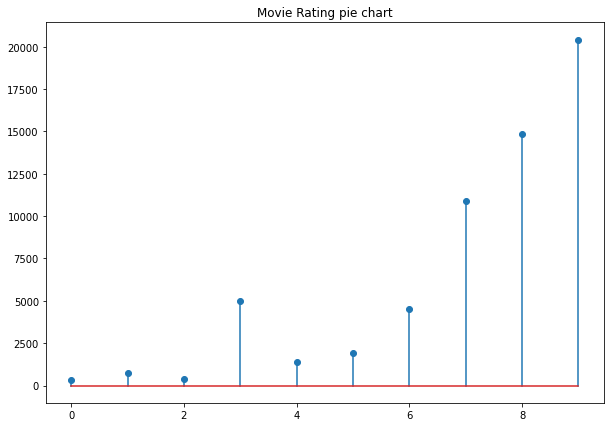

In [93]:
labels = []
sizes = []
fig,ax = plt.subplots(figsize =(10, 7))
for x, y in c.items():
    labels.append(x)
    sizes.append(y)

#Plot
plt.stem(sizes[::-1])
ax.set_title("Movie Rating pie chart")

plt.show()

In [82]:
sizes

[20428, 14856, 10900, 4542, 1902, 1409, 4990, 362, 713, 322]

In [60]:
c.keys()[0]/sum(c.values())


TypeError: ignored

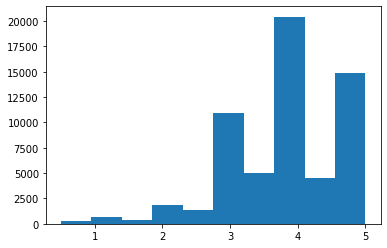

In [55]:

plt.hist(x)
plt.show() 


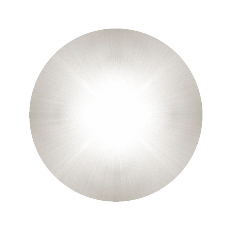

In [54]:
plt.pie(x)
plt.show() 